# Same part, new supplier
The following code generates the figures found in the essay *Same part, new supplier*. The essay can be found [here](https://static1.squarespace.com/static/5b722db6f2e6b1ad5053391b/t/67a64c21fe4e8d2763b7aa06/1738951714572/Same+parts+new+supplier.pdf).

Figure 2 and Figure 3 are generated using the Python package `process_improvement.py`. This package can be found [here](https://pypi.org/project/process-improvement/). Package can be installed using `pip install process-improvement`.

In [18]:
# Import libraries
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
# Figure 2 is generated using xmr.xmrchart()
from process_improvement import xmr_charts as xmr
# Figure 4 is generated using pc.capability_histogram()
from process_improvement import process_capability as pc

In [3]:
# Dataset URL
dataset_url = 'https://raw.githubusercontent.com/jimlehner/broken-quality-initiative/refs/heads/main/data/same_part_new_supplier-socket_contact_inner_diameter_measurements.csv'

# Get data
def get_data() -> pd.DataFrame:
    return pd.read_csv(dataset_url)

# Get data
df = get_data()
df.head()

,Characteristic,Sample,ID
0,Inner diameter,1,4.14
1,Inner diameter,2,4.05
2,Inner diameter,3,4.18
3,Inner diameter,4,4.10
4,Inner diameter,5,4.19


In [20]:
# Specify Sample column as dtype string
df['Sample'] = df['Sample'].astype('string')
# Verify dtypes
df.dtypes

Characteristic     object
Sample             string
ID                float64
dtype: object

## Fig 2: XmR Chart of socket contact ID measurements

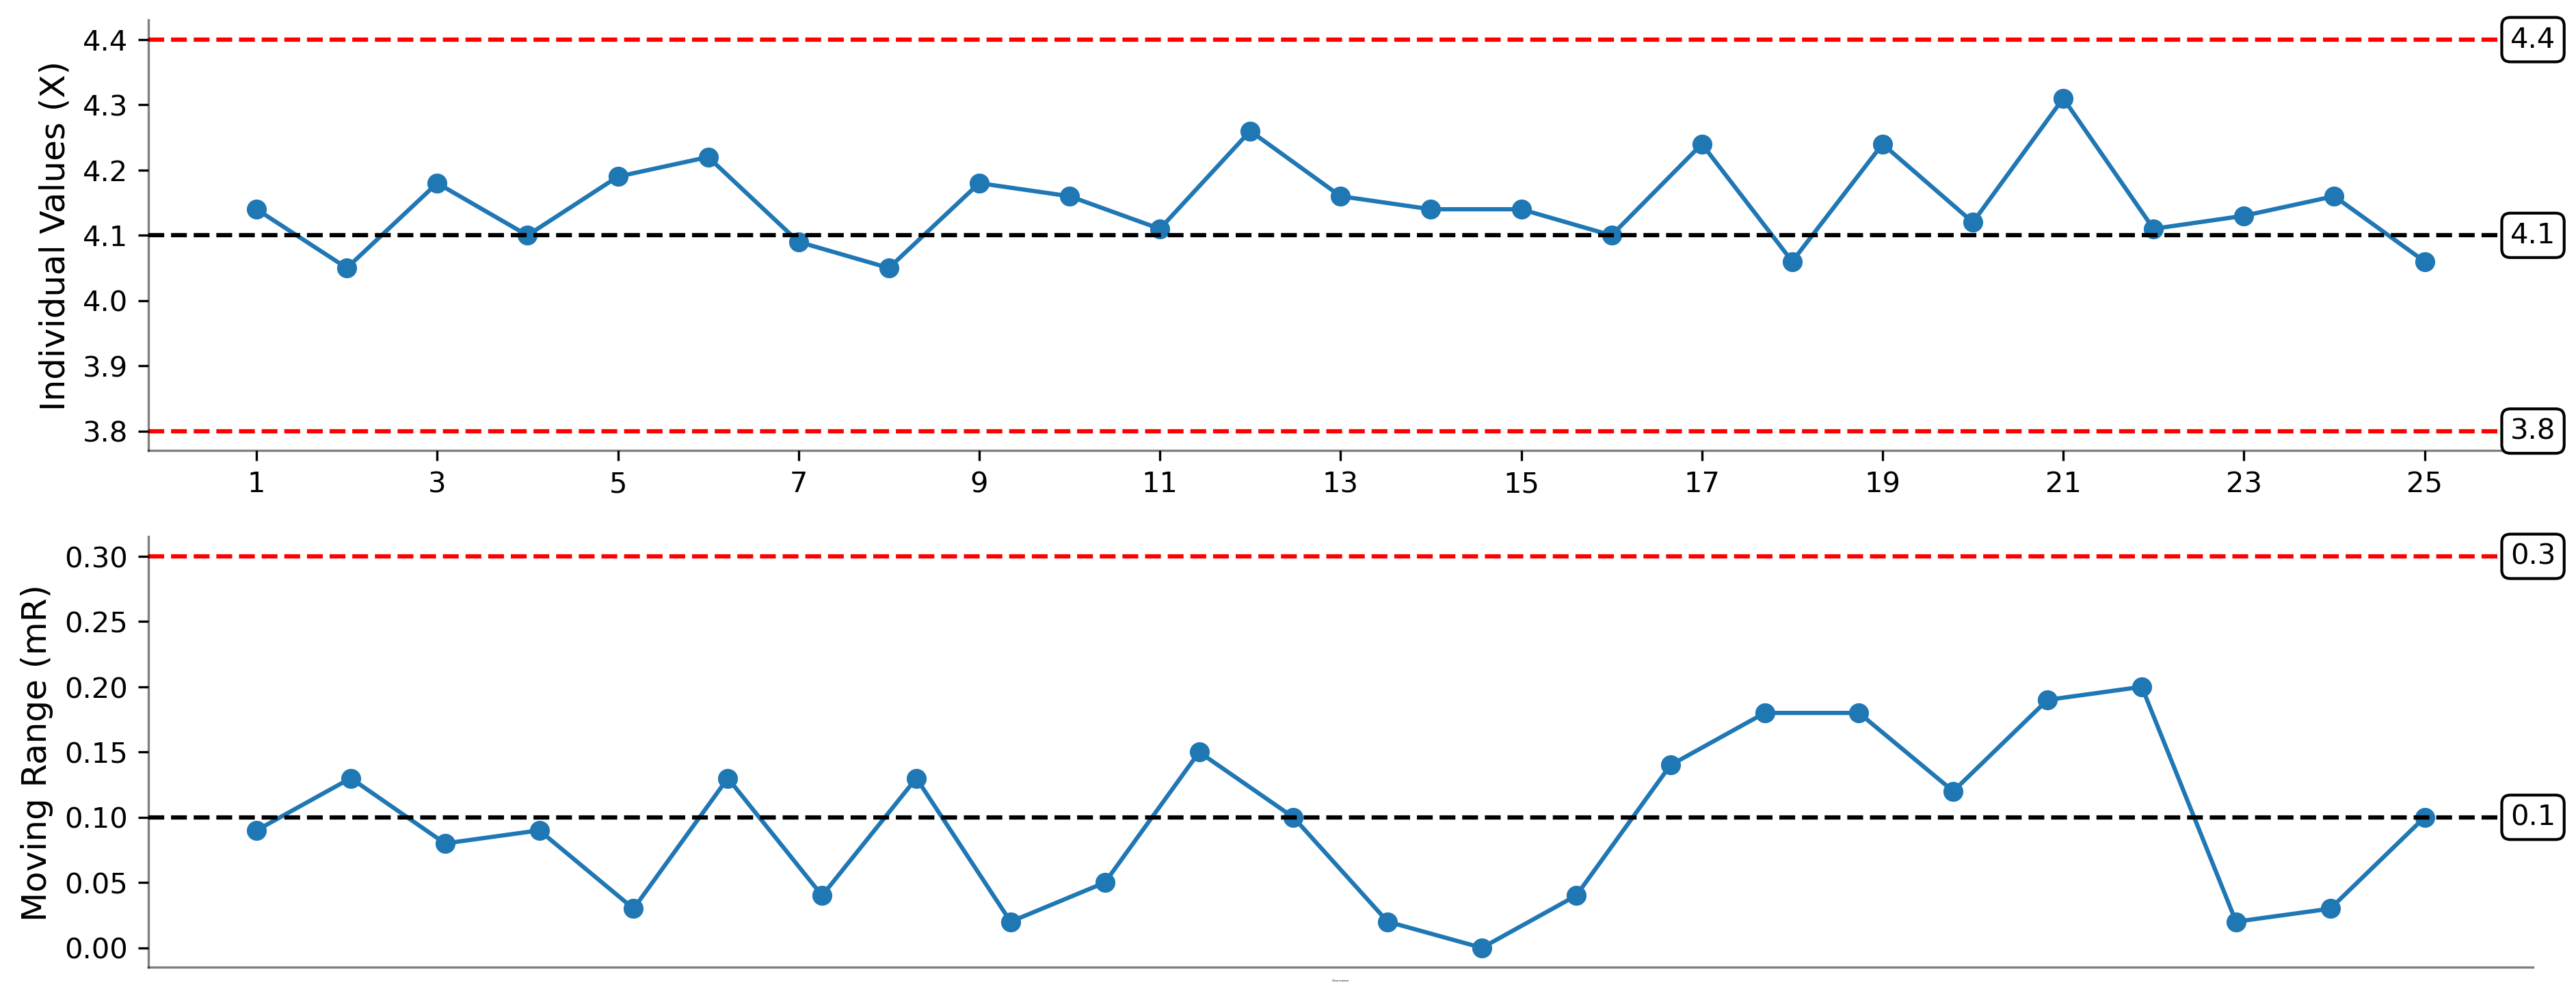

In [24]:
socket_ID_results = xmr.xmrchart(df, 'ID', 'Sample', tickinterval=2,
                                round_value=1)

In [9]:
# Show summary statistics
socket_ID_results['XmR Chart Statistics']

,Chart,PBC Params,Param Values
0,X-Chart,Mean,4.15
1,X-Chart,UPL,4.39
2,X-Chart,LPL,3.91
3,X-Chart,PLR,0.48
4,mR-Chart,Ave. mR,0.09
5,mR-Chart,URL,0.29


## Fig 3: Capability histogram of socket contact ID measurements

In [11]:
# Specify values for USL, LSL, target, and tolerance
target = 4.39
tolerance = 0.16
USL = target + tolerance
LSL = target - tolerance

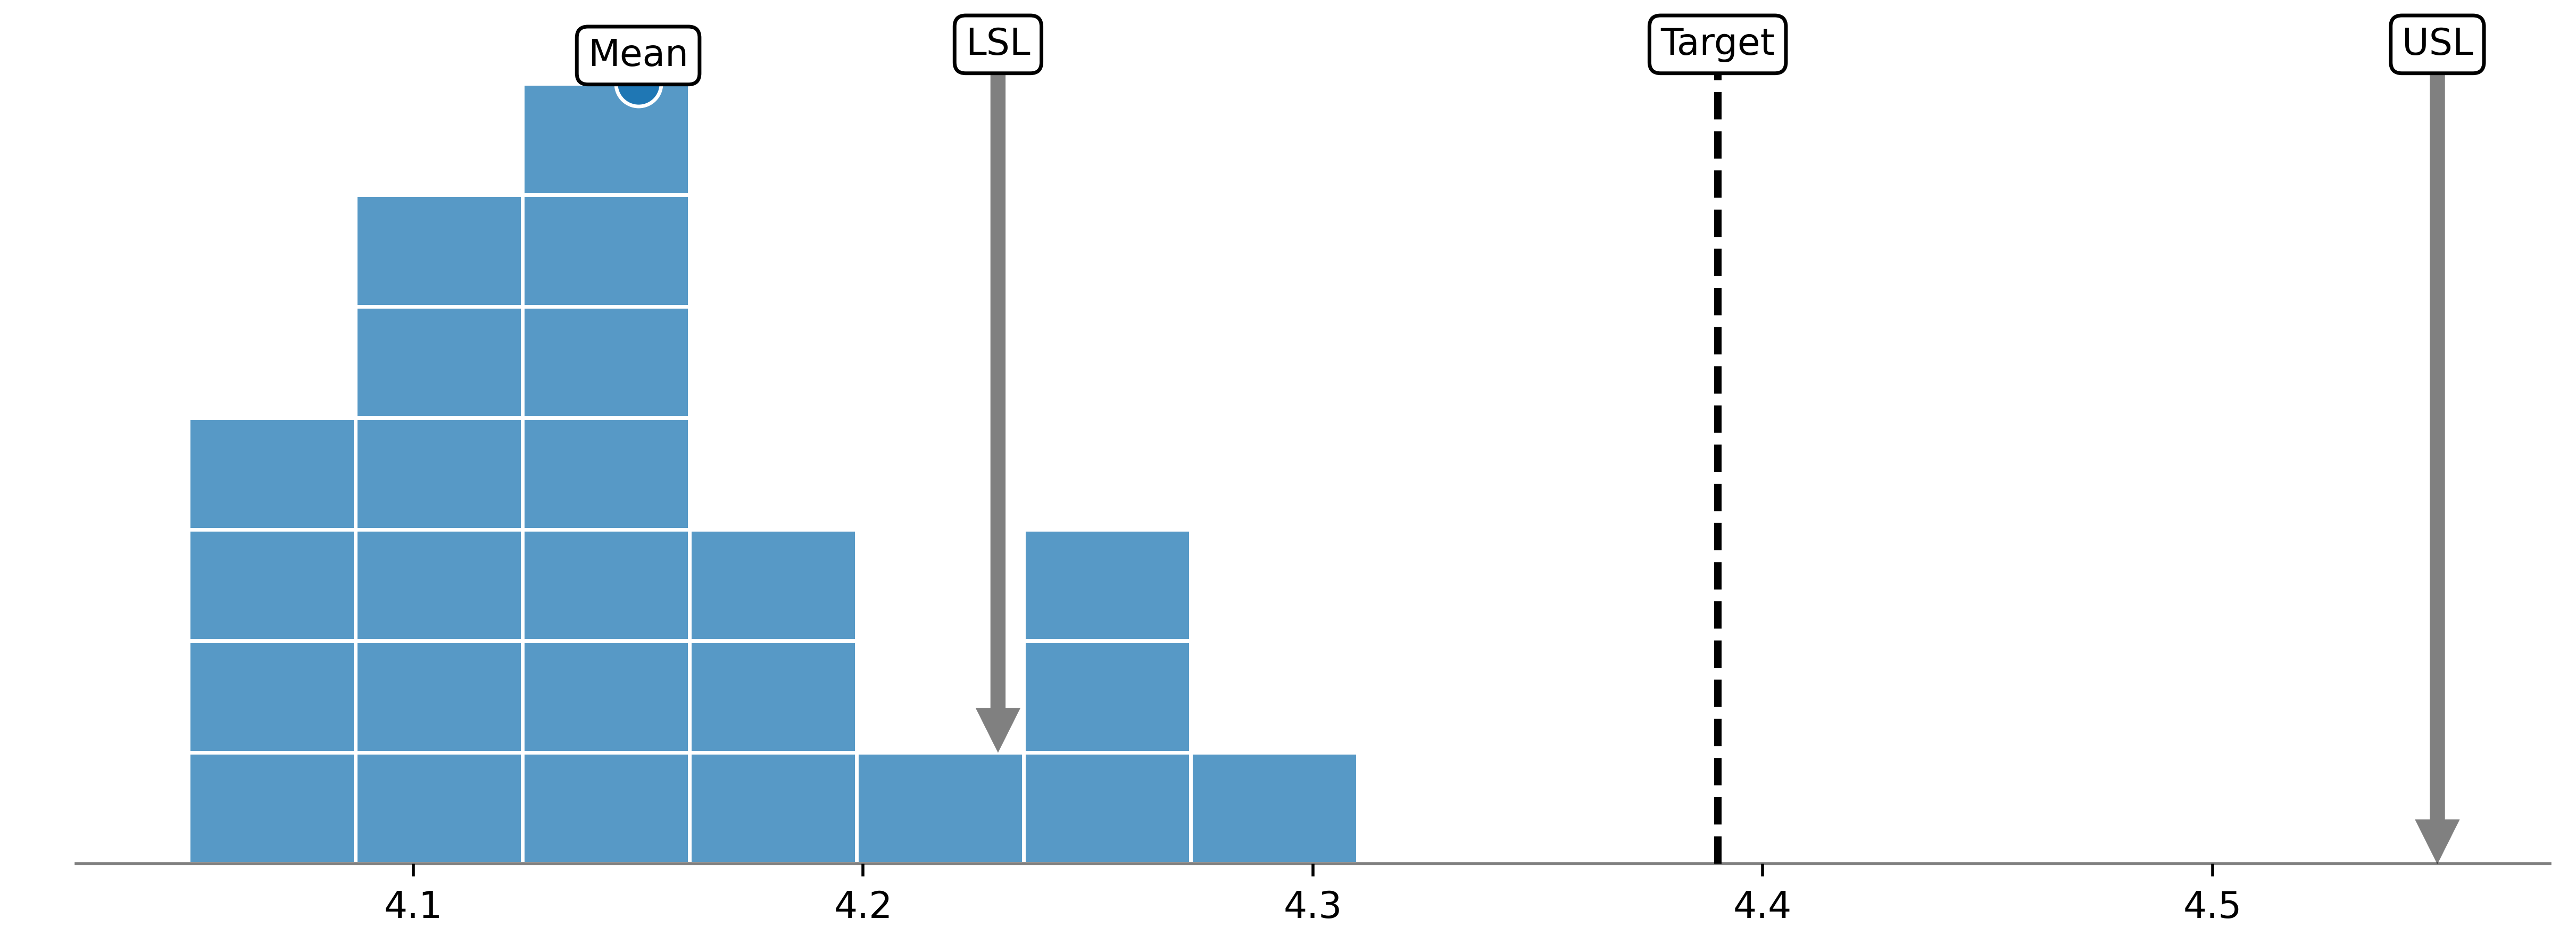

In [16]:
capability_hist_results = pc.capability_histogram(df['ID'], USL, LSL, target, bins=7,
                       show_capabilities=False)

In [17]:
# Show process capability indices
capability_hist_results

{'Characterization': 'Predictable',
 'Cp': 0.64,
 'Cpk': -0.32,
 'Pp': 0.76,
 'Ppk': -0.38}

## Code for figures 4 and 5 are not included at this time